## Inventory models
Here is some code to solve the simple economic order quantity model. 

It is not quite finished. I am working on the case where there is a delivery lag...

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Economic order quantity model

A retailer faces demand for its good $D$ in each period (say, one year). The firm must pay a fixed cost $f$ to order more goods to resell. The firm can hold inventories to save on the fixed cost of ordering. The ad valorem cost of holding inventories is $h$. The firm seeks to minimize cost over a period of time by choosing the size of the order, $Q$, 


$$\min_Q TC = PD + \frac{D}{Q}f + h\frac{Q-0}{2}$$

where $P$ is the cost of each good ordered. The first term is the cost of the goods. The second term is the cost of ordering. The third term is the inventory holding cost: $\frac{Q-0}{2}$ is the average inventory holding in the period. 

The first-order condition is 

$$ \frac{Df}{Q^{-2}}=\frac{h}{2}.$$

In [4]:
def eoq(D, h , f):
    """
    Compute the solution to the eoq model. Return the optimal order size (Q), number of orders (n),
    and order frequency (freq). Print out the values of Q, n, and freq.
    """
    Q = np.sqrt( (2*D*f)/h )  # Order size
    n = D/Q                   # Number of orders
    freq = 1/n                # Frequency of orders
    
    print('Optimal order size is {0:.2f}'.format(Q))
    print('Number of orders per period is {0:.2f}'.format(n))
    print('An order is placed every {0:0.2f} periods'.format(freq))
    print('Average inventory holdings are {0:0.2f}'.format(Q/2))
    
    return Q, n, freq

In [5]:
D = 1            # Annual demand
h = 0.05         # Proportional cost of holding inventories
f = 0.4          # Fixed cost of each order

Q, n, freq = eoq(D, h, f)

Optimal order size is 4.00
Number of orders per period is 0.25
An order is placed every 4.00 periods
Average inventory holdings are 2.00


### Inventory dynamics

In [6]:
def eoq_dynamics(D, Q, T):
    """
    Compute a time series of relevant variables. Return sales, average inventories, inventories,
    and imports (more generally, orders). The inventory variable is the begining of period
    inventory level.
    """
        
    sales = np.ones(T)*D
    avg_inv = np.ones(T)*Q/2

    inventory_b = np.zeros(T)
    inventory_e = np.zeros(T)
    imports = np.zeros(T)  # This is orders, but if you are ordering from abroad, it is imports, too. 

    # time zero
    inventory_b[0] = Q
    inventory_e[0] = Q - D
    
    #print(0, inventory_b[0], inventory_e[0])
    
    # loop over time
    for t in range(1, T):
        inventory_b[t] = inventory_e[t-1] + imports[t-1]
        inventory_e[t] = inventory_b[t] - D 
        if inventory_e[t] == 0:       # If I stocked out, reorder
            imports[t] = Q
            #print(t, 'imports')
        
        
        #print(t, inventory_b[t], inventory_e[t])
        
        
            

    return sales, avg_inv, inventory_b, inventory_e, imports

Let's plot the dynamics. Note that the inventory variable is the **beginning of period** stock. 

In [7]:
sales, avg_inv, inventory_b, inventory_e, imports = eoq_dynamics(D, Q, 16)

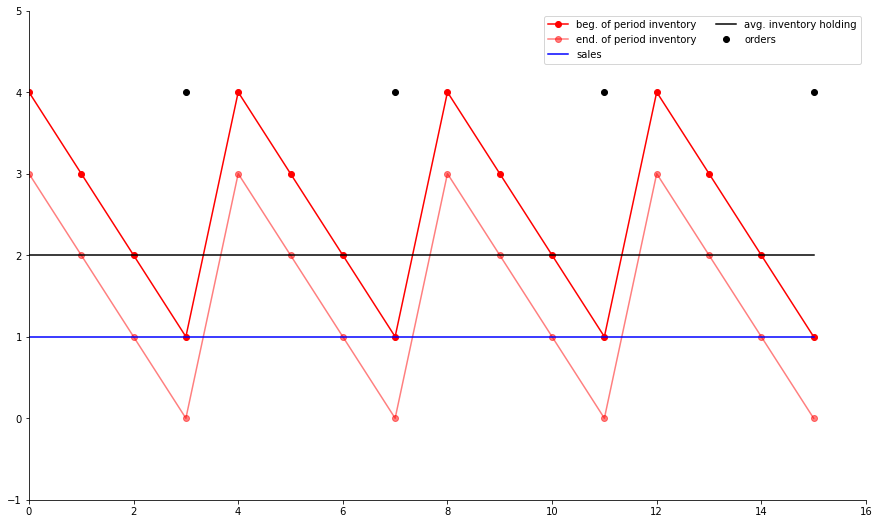

In [8]:
# I do not want to plot the zeros in the imports, so I make them NaNs
imports[imports==0] = np.nan


fig, ax1 = plt.subplots(figsize=(15,9))

ax1.plot(range(16), inventory_b, color='red', marker = 'o', label = 'beg. of period inventory')
ax1.plot(range(16), inventory_e, color='red', marker = 'o', alpha=0.5, label = 'end. of period inventory')
ax1.plot(range(16), sales, color='blue', label = 'sales')
ax1.plot(range(16), avg_inv, color='black', label = 'avg. inventory holding')
ax1.plot(range(16), imports, color = 'black', linestyle='', marker='o', label='orders')

ax1.set_ylim(-1,5)
ax1.set_xlim(0,16)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.legend(frameon=True, ncol=2)
plt.show()

We have saw-toothed inventory patterns.  Four periods after its last order, the firm has no inventories and reorders. Since there is no lag, the goods show up in that period and the firm can still meet its demand. 

## Increased order costs

Suppose the cost per order increases...

In [9]:
Q2, n2, freq2 = eoq(D, h, 1.6)
sales2, avg_inv2, inventory_b2, inventory_e2, imports2 = eoq_dynamics(D, Q2, 16)

Optimal order size is 8.00
Number of orders per period is 0.12
An order is placed every 8.00 periods
Average inventory holdings are 4.00


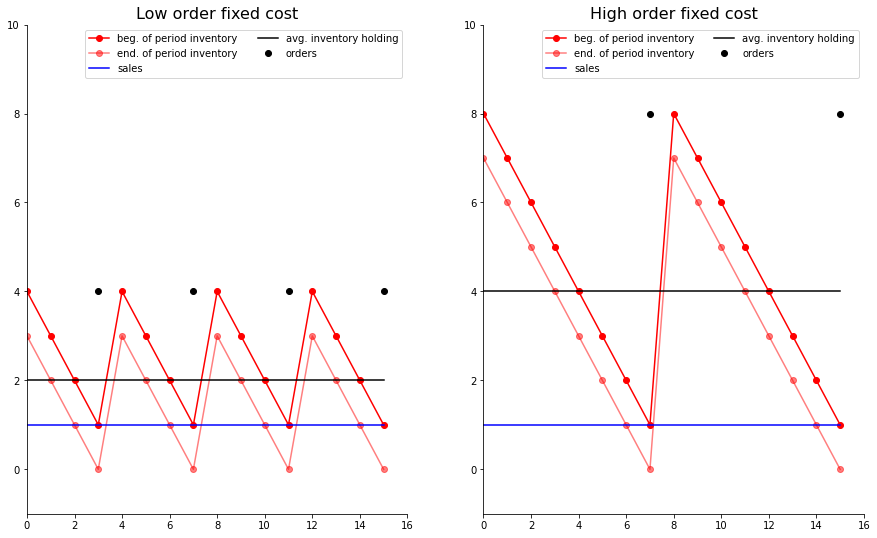

In [10]:
# I do not want to plot the zeros in the imports, so I make them NaNs
imports2[imports2==0] = np.nan
imports[imports==0] = np.nan


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))

ax1.plot(range(16), inventory_b, color='red', marker = 'o', label = 'beg. of period inventory')
ax1.plot(range(16), inventory_e, color='red', marker = 'o', alpha=0.5, label = 'end. of period inventory')
ax1.plot(range(16), sales, color='blue', label = 'sales')
ax1.plot(range(16), avg_inv, color='black', label = 'avg. inventory holding')
ax1.plot(range(16), imports, color = 'black', linestyle='', marker='o', label='orders')

ax1.set_ylim(-1,10)
ax1.set_xlim(0,16)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_title('Low order fixed cost', fontsize=16)

ax1.legend(frameon=True, ncol=2)


ax2.plot(range(16), inventory_b2, color='red', marker = 'o', label = 'beg. of period inventory')
ax2.plot(range(16), inventory_e2, color='red', marker = 'o', alpha=0.5, label = 'end. of period inventory')
ax2.plot(range(16), sales2, color='blue', label = 'sales')
ax2.plot(range(16), avg_inv2, color='black', label = 'avg. inventory holding')
ax2.plot(range(16), imports2, color = 'black', linestyle='', marker='o', label='orders')

ax2.set_ylim(-1,10)
ax2.set_xlim(0,16)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_title('High order fixed cost', fontsize=16)

ax2.legend(frameon=True, ncol=2)
plt.show()